# Problem Set 5, Part One: Due Thursday, February 27 by 8am Eastern Standard Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### Conover (and other) Problems on Relative Efficiency

#### Exercise 2.4.2:

Two types of shoe leather are being tested to see which is more durable.
Eight pairs of shoes are made; the shoes seem to be identical except
that one shoe is made from leather A and the other from leather B. These
shoes are subjected to normal wear for a period of time and are then
judged as to which leather seemed to be more durable for each pair. Let
${\color{royalblue}{X}}$ be equal the number of pairs of shoes where
leather A is judged to be more durable. The null hypothesis is that
$p=0.5$, where $p$ is the probability that the shoe made out of leather
A was more durable than the other shoe, while $H_1$ is $p\ne 0.5$. The
critical region corresponds to ${\color{royalblue}{X}}=0$, $1$, $7$, and
$8$.

**(a)** Find $\alpha$.

In [3]:
n, p = 8, 0.5

x0, x1 = stats.binom(n, p).cdf(0), stats.binom(n, p).cdf(1)
x7, x8 = stats.binom(n, p).sf(7-1), stats.binom(n, p).sf(8-1)

print(x0, x1, x7, x8)

a = x1 * 2

print(a)

0.00390625 0.03515625 0.03515625 0.00390625
0.0703125


**(b)** What is the power function?

In [4]:
theta = np.linspace(0, 1, 100)
gamma = stats.binom(n, theta).pmf(0) + stats.binom(n, theta).pmf(1) + stats.binom(n, theta).pmf(7) + stats.binom(n, theta).pmf(8)

In [5]:
gamma

array([1.        , 0.99725641, 0.98946179, 0.97723344, 0.96114166,
       0.94171225, 0.91942902, 0.89473615, 0.86804047, 0.83971366,
       0.81009437, 0.7794902 , 0.74817966, 0.71641405, 0.68441919,
       0.65239719, 0.62052801, 0.58897108, 0.55786677, 0.52733781,
       0.49749067, 0.46841685, 0.44019411, 0.41288767, 0.38655131,
       0.36122848, 0.33695327, 0.31375137, 0.29164104, 0.27063391,
       0.25073582, 0.23194761, 0.21426579, 0.19768328, 0.18219002,
       0.16777356, 0.15441962, 0.14211263, 0.13083616, 0.12057342,
       0.1113076 , 0.1030223 , 0.0957018 , 0.08933141, 0.0838977 ,
       0.07938874, 0.07579428, 0.07310594, 0.07131732, 0.0704241 ,
       0.0704241 , 0.07131732, 0.07310594, 0.07579428, 0.07938874,
       0.0838977 , 0.08933141, 0.0957018 , 0.1030223 , 0.1113076 ,
       0.12057342, 0.13083616, 0.14211263, 0.15441962, 0.16777356,
       0.18219002, 0.19768328, 0.21426579, 0.23194761, 0.25073582,
       0.27063391, 0.29164104, 0.31375137, 0.33695327, 0.36122

**(c)** Draw a graph of the power function.

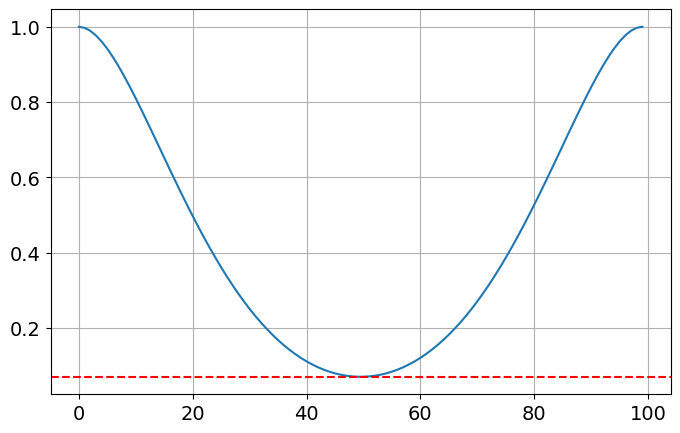

In [6]:
plt.plot(gamma);
plt.axline((0, a), (1, a), color='red', linestyle='--')
plt.grid();
plt.show();

**(d)** Is the test unbiased?

Yes, because the power is at its minimum at p = 0.5 (equal to α) and increases for all other values of p.

#### Followup:

In the previous problem, for each of the following critical regions,
calculate $\alpha$ and $\gamma(0.25)$:

In [7]:
n = 8
p = 0.5
p_new = 0.25

**(a)** ${\color{royalblue}{X}} \in \{0,1,2,3,4,5,6,7,8\}$

In [8]:
a_0 = stats.binom(n, p).cdf(8)
power_0 = stats.binom(n, p_new).cdf(8)

print(a_0, power_0)

1.0 1.0


**(b)** ${\color{royalblue}{X}} \in \{0,1,2,3,5,6,7,8\}$

In [9]:
a_1 = stats.binom(n, p).cdf(3) + stats.binom(n, p).sf(5-1)
power_1 = stats.binom(n, p_new).cdf(3) + stats.binom(n, p_new).sf(5-1)

print(a_1, power_1)

0.7265625 0.913482666015625


**(c)** ${\color{royalblue}{X}} \in \{0,1,2,6,7,8\}$

In [10]:
a_2 = stats.binom(n, p).cdf(2) + stats.binom(n, p).sf(6-1)
power_2 = stats.binom(n, p_new).cdf(2) + stats.binom(n, p_new).sf(6-1)

print(a_2, power_2)

0.2890625 0.682769775390625


**(d)** ${\color{royalblue}{X}} \in \{0,1,7,8\}$

In [11]:
a_3 = stats.binom(n, p).cdf(1) + stats.binom(n, p).sf(7-1)
power_3 = stats.binom(n, p_new).cdf(1) + stats.binom(n, p_new).sf(7-1)

print(a_3, power_3)

0.0703125 0.367462158203125


**(e)** ${\color{royalblue}{X}} \in \{0,8\}$

In [12]:
a_4 = stats.binom(n, p).cdf(0) + stats.binom(n, p).sf(8-1)
power_4 = stats.binom(n, p_new).cdf(0) + stats.binom(n, p_new).sf(8-1)

print(a_4, power_4)

0.0078125 0.10012817382812503


**(f)** ${\color{royalblue}{X}} \in \{\emptyset\}$ (i.e., never reject $H_0$)

In [13]:
a_5, power_5 = 0, 0

print(a_5, power_5)

0 0


**(g)** Use the results to plot the ROC curve for this family of tests when the
alternative hypothesis is $p=0.25$.

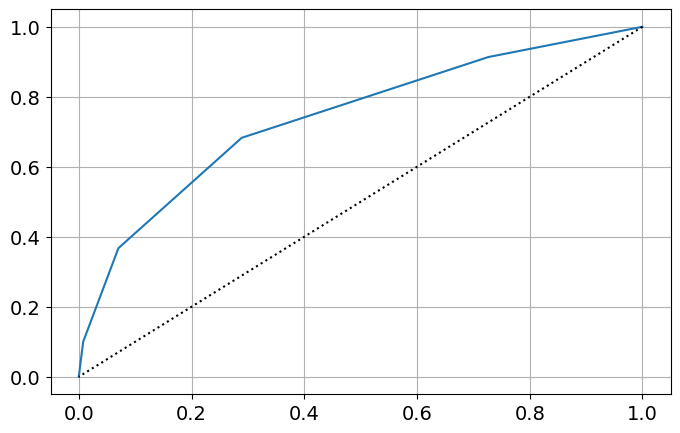

In [14]:
alphas = np.array([a_0, a_1, a_2, a_3, a_4, a_5])
powers = np.array([power_0, power_1, power_2, power_3, power_4, power_5])


plt.plot(alphas, powers); plt.plot(alphas, alphas, 'k:');
plt.grid();
plt.show();

#### Problem 2.4.1:

Suppose that the asymptotic efficiency of $T_2$ relative to $T_1$ is
$0.75$, and suppose that the relative efficiency for finite sample sizes
is always greater than the asymptotic relative efficiency. If an
experimenter prefers to use test $T_2$ but wishes to have at least as
much power as if test $T_1$ were being used with a sample size of $24$,
what should the minimum sample size be?

\begin{align}
    n_2 &= \frac{n_1}{ARE(T_2, T_1)} \\
        &= \frac{24}{0.75} \\
        &= 32
\end{align}

Given that the relative efficiency for finite sample sizes is always greater than the asymptotic relative efficiency, the minimum sample size would be $31$.

### Conover Problems on Kruskal-Wallis Tests

#### Exercise 5.2.2:

Four job training programs were tried on 20 new employees, where 5
employees were randomly assigned to each training program. The 20
employees were then placed under the same supervisor and, at the end of
a certain specified period, the supervisor ranked the employees
according to job ability, with the lowest ranks being assigned to those
employees with the lowest job ability.

<table>
<tr>
    <th>Program</th><td></td>
</tr>
<tr><td>1</td><td>4, 6, 7, 2, 10</td></tr>
<tr><td>2</td><td>1, 8, 12, 3, 11</td></tr>
<tr><td>3</td><td>20, 19, 16, 14, 5</td></tr>
<tr><td>4</td><td>18, 15, 17, 13, 9<td></tr>
</table>

Do these data indicate a difference in effectiveness of the various
training programs? If so, which ones seem to be different?
\[Calculate a $p$-value.\]

In [15]:
x_i_j = [
    np.array([ 4, 6, 7, 2, 10 ]),
    np.array([ 1, 8, 12, 3, 11 ]),
    np.array([ 20, 19, 16, 14, 5 ]),
    np.array([ 18, 15, 17, 13, 9 ])
]

n_i = np.array([len(xi_j) for xi_j in x_i_j])
k = len(n_i)
N = np.sum(n_i)

print(n_i, k)

[5 5 5 5] 4


In [16]:
x_r = np.concatenate(x_i_j)

print(x_r)

R_r = stats.rankdata(x_r)

print(R_r)

[ 4  6  7  2 10  1  8 12  3 11 20 19 16 14  5 18 15 17 13  9]
[ 4.  6.  7.  2. 10.  1.  8. 12.  3. 11. 20. 19. 16. 14.  5. 18. 15. 17.
 13.  9.]


In [17]:
i_r = np.concatenate([(i,)*n_i[i] for i in range(k)])
R_i_j = [R_r[i_r==i] for i in range(k)]; R_i_j

R_i = np.array([np.sum(Ri_j) for Ri_j in R_i_j])

print(R_i)

Rbar = 0.5*(N+1); (Rbar,np.mean(R_r))

[29. 35. 74. 72.]


(10.5, 10.5)

In [18]:
T = 12/(N*(N+1)) * np.sum((R_i-n_i*Rbar)**2/n_i)

print(T)

stats.chi2(df=k-1).sf(T)

9.719999999999999


0.021102512414100234

$H_0: $ The training programs have no effect (same distributions of ranks).

$H_1: $ At least one training program is different.

$T = 9.7199$ 

$p\text{-value} = 0.02110$

Groups 1 and 2 seem to be different than 3 and 4.

In [19]:
# double check
stats.kruskal(*x_i_j)

KruskalResult(statistic=9.719999999999999, pvalue=0.021102512414100234)

#### Exercise 5.2.6:

Twelve volunteers were assigned to each of three weight-reducing plans.
The assignment of the volunteers to the plans was at random, and it was
assumed that the 36 volunteers in all would resemble a random sample of
people who might try a weight-reducing program. Test the null hypothesis
that there is no difference in the probability distributions of the
amount of weight lost under the three programs against the alternative
that there is a difference. The results are given as the number of
pounds lost by each person.

<table>
<tr>
<th colspan="2">Plan A</th>
<th colspan="2">Plan B</th>
<th colspan="2">Plan C</th>
</tr></td></tr>
<tr><td> 2</td><td>17</td><td>17</td><td> 5</td><td>29</td><td> 5</td></tr>
<tr><td>12</td><td> 4</td><td>15</td><td> 6</td><td> 3</td><td>25</td></tr>
<tr><td> 5</td><td>25</td><td> 3</td><td>19</td><td>25</td><td>32</td></tr>
<tr><td> 4</td><td> 6</td><td>19</td><td> 4</td><td>28</td><td>24</td></tr>
<tr><td>26</td><td>21</td><td> 5</td><td> 9</td><td>11</td><td>36</td></tr>
<tr><td> 8</td><td> 6</td><td>14</td><td> 7</td><td> 7</td><td>20</td></tr>
</table>

In [20]:
x_i_j = [
    np.array([ 2, 12, 5, 4, 26, 8, 17, 4, 25, 6, 21, 6 ]),
    np.array([ 17, 15, 3, 19, 5, 14, 5, 6, 19, 4, 9, 7 ]),
    np.array([ 29, 3, 25, 28, 11, 7, 5, 25, 32, 24, 36, 20 ])
]

n_i = np.array([len(xi_j) for xi_j in x_i_j])
k = len(n_i)
N = np.sum(n_i)

print(n_i, k)

[12 12 12] 3


In [21]:
x_r = np.concatenate(x_i_j)

print(x_r)

R_r = stats.rankdata(x_r)

print(R_r)

[ 2 12  5  4 26  8 17  4 25  6 21  6 17 15  3 19  5 14  5  6 19  4  9  7
 29  3 25 28 11  7  5 25 32 24 36 20]
[ 1.  19.   8.5  5.  32.  16.  22.5  5.  30.  12.  27.  12.  22.5 21.
  2.5 24.5  8.5 20.   8.5 12.  24.5  5.  17.  14.5 34.   2.5 30.  33.
 18.  14.5  8.5 30.  35.  28.  36.  26. ]


In [22]:
i_r = np.concatenate([(i,)*n_i[i] for i in range(k)])
R_i_j = [R_r[i_r==i] for i in range(k)]; R_i_j

R_i = np.array([np.sum(Ri_j) for Ri_j in R_i_j])

print(R_i)

Rbar = 0.5*(N+1); (Rbar,np.mean(R_r))

[190.  180.5 295.5]


(18.5, 18.5)

In [23]:
T = 12/(N*(N+1)) * np.sum((R_i-n_i*Rbar)**2/n_i)

print(T)

stats.chi2(df=k-1).sf(T)

6.117492492492493


0.046946517710629375

$H_0: $ Weight loss distributions are identical across the three plans.

$H_1: $ At least one weight loss plan is different.

$T = 6.1174$

$p\text{-value} = 0.0469$

In [24]:
# double check
stats.kruskal(*x_i_j)

KruskalResult(statistic=6.138031594352627, pvalue=0.04646686517954499)

#### Problem 5.2.2:

Find the exact distribution of the Kruskal-Wallis test statistic when
$H_0$ is true, $n_1=3$, $n_2=2$, $n_3=1$, and there are no ties. Compare
your results with the quantiles given in Table A8.
\[Also compare with the chi-squared approximation.\]

\[You may find it useful to use the following function, defined in <https://mail.python.org/pipermail/python-list/2011-September/612810.html>, which is an analog of <https://docs.python.org/3/library/itertools.html#itertools.combinations>

In [25]:
import itertools
def multinomial_combinations(items, ns):
    if len(ns) == 1:
        for c in itertools.combinations(items, ns[0]):
            yield (c,)
    else:
        for c_first in itertools.combinations(items, ns[0]):
            items_remaining= set(items) - set(c_first)
            for c_other in multinomial_combinations(items_remaining, ns[1:]):
                 yield (c_first,) + c_other

This is an "iterator", which lets you loop through the $\frac{6!}{3!2!1!}=60$ different ways of partitioning the $N=6$ ranks $\{1,2,3,4,5,6\}$ into groups of $n_1=3$, $n_2=2$, and $n_3=1$.

In [26]:
n_i = np.array([3,2,1])
N = np.sum(n_i)
k = len(n_i)
R_r = np.arange(1,N+1); R_r

array([1, 2, 3, 4, 5, 6])

In [27]:
T_i_j = np.array([
    (12 / (N * (N + 1))) * np.sum((np.array([sum(group) for group in R_i_j])**2 / n_i)) - 3 * (N + 1) 
    for R_i_j in multinomial_combinations(R_r,n_i)
])

In [29]:
unique_T, counts = np.unique(T_i_j, return_counts=True)
T_dist = dict(zip(unique_T, counts / len(T_i_j))) 

In [30]:
sorted_T = np.array(sorted(T_dist.keys()))

empirical_cdf = np.cumsum([T_dist[T] for T in sorted_T])
chi2_cdf = stats.chi2.cdf(sorted_T, df=k-1)

# Print comparison
print(f"{'T':<10}{'Empirical':<20}{'Chi-Square'}")
for T_val, emp_cdf, chi2_prob in zip(sorted_T, empirical_cdf, chi2_cdf):
    print(f"{T_val:<10.4f}{emp_cdf:<20.4f}{chi2_prob:.4f}")


T         Empirical           Chi-Square
0.0952    0.0667              0.0465
0.2381    0.1000              0.1122
0.4286    0.1667              0.1929
0.8095    0.2000              0.3329
0.8571    0.3000              0.3486
1.2381    0.3167              0.4615
1.2381    0.4000              0.4615
1.3810    0.4167              0.4987
1.3810    0.4333              0.4987
1.9524    0.4500              0.6233
1.9524    0.4667              0.6233
2.1429    0.5667              0.6575
2.3810    0.6333              0.6959
2.3810    0.7333              0.6959
3.0952    0.7667              0.7872
3.0952    0.8000              0.7872
3.5238    0.8500              0.8283
3.5238    0.8667              0.8283
3.8571    0.9000              0.8546
4.2857    1.0000              0.8827
